In [2]:
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [29]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col = 0 ) 
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


1- ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

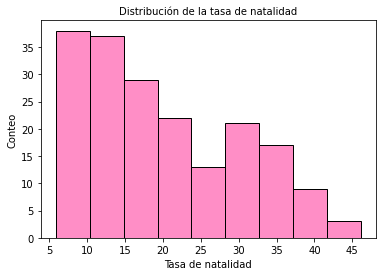

In [5]:
sns.histplot(x='birth_rate', data=df, color='hotpink')
plt.xlabel('Tasa de natalidad')
plt.ylabel("Conteo")
plt.title("Distribución de la tasa de natalidad", fontsize = 10);

2- ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

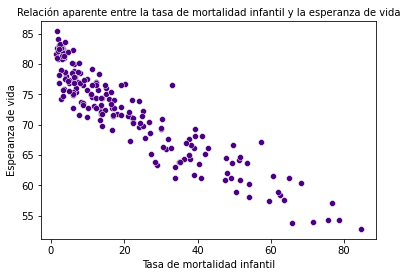

In [6]:
sns.scatterplot(x='infant_mortality', y='life_expectancy', data=df, markers='.', color='indigo')
plt.xlabel('Tasa de mortalidad infantil')
plt.ylabel("Esperanza de vida")
plt.title("Relación aparente entre la tasa de mortalidad infantil y la esperanza de vida", fontsize = 10);

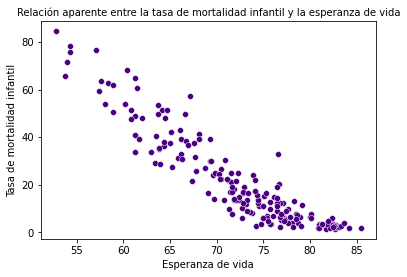

In [7]:
sns.scatterplot(x='life_expectancy', y='infant_mortality', data=df, markers='.', color='indigo')
plt.xlabel('Esperanza de vida')
plt.ylabel("Tasa de mortalidad infantil")
plt.title("Relación aparente entre la tasa de mortalidad infantil y la esperanza de vida", fontsize = 10);

Sí existe una relación y es que en los paises con mortalidad infantil más baja hay mayor esperanza de vida. Por el contario ahí donde la esperanza de vida es más baja, la mortalidad infantil es más alta. 

3- ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [8]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Central America', 'South America',
       'Oceania', 'North America', nan], dtype=object)

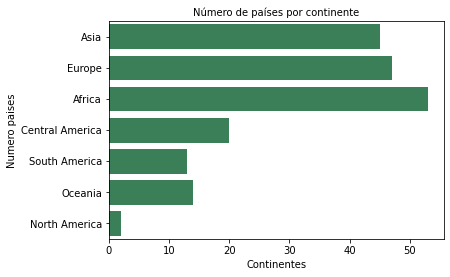

In [12]:
sns.countplot(y='continent', data=df, color="seagreen")

plt.xlabel('Continentes')
plt.ylabel("Numero paises")
plt.title("Número de países por continente", fontsize = 10);

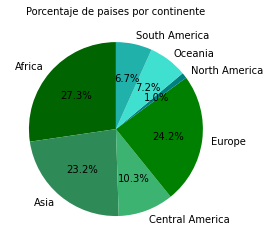

In [14]:
continentes = df.groupby('continent')['country'].count().reset_index()
colores = ["darkgreen", "seagreen", "mediumseagreen", "g", "teal", "turquoise", "lightseagreen"]

plt.pie(x='country', labels='continent', data=continentes, autopct=  '%1.1f%%', colors = colores, startangle=90)
plt.title("Porcentaje de paises por continente", fontsize = 10);

El continente con mayor cantidad de países es África (en el plt.pie se puede ver que tiene el 27.3%)

4- ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

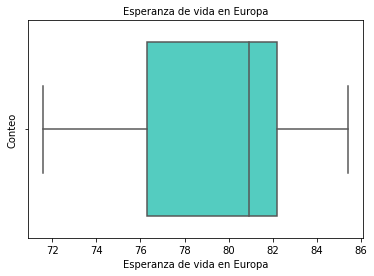

In [15]:
sns.boxplot(x='life_expectancy', data=df[df['continent']=='Europe'], color='turquoise')

plt.xlabel('Esperanza de vida en Europa')
plt.ylabel("Conteo")
plt.title("Esperanza de vida en Europa", fontsize = 10);

In [17]:
df.groupby('continent')['life_expectancy'].median().reset_index()

,continent,life_expectancy
0,Africa,63.60
1,Asia,73.05
2,Central America,74.45
3,Europe,80.90
4,North America,80.20
5,Oceania,69.70
6,South America,75.70


No se ve que se existan valores atípicos en la gráfica. La mediana estaría entre los 80 y 82 años, que sacando el DataFrame nos demuestra que es así.

5- ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

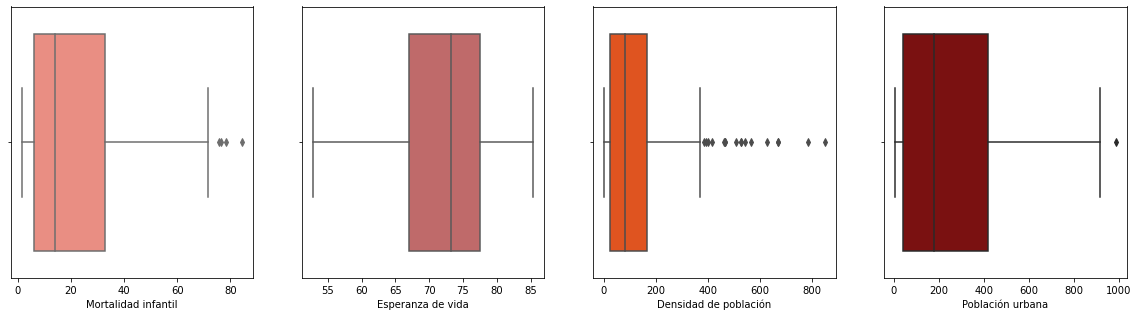

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

sns.boxplot(x='infant_mortality', data=df, ax = axes[0], color='salmon')

sns.boxplot(x='life_expectancy', data=df, ax = axes[1], color='indianred')

sns.boxplot(x='density', data=df, ax = axes[2], color='orangered')

sns.boxplot(x='urban_population', data=df, ax = axes[3], color='darkred')

axes[0].set_xlabel("Mortalidad infantil")
axes[1].set_xlabel("Esperanza de vida")
axes[2].set_xlabel("Densidad de población")
axes[3].set_xlabel("Población urbana");

6- ¿Cuáles son los 10 países con la mayor área forestal?

7- ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

8- ¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

9- ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

10- Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:   
    - Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.   
    - Un histograma de la tasa de impuestos total.   
    - Un gráfico de barras que resuma la tasa de impuestos total por continente.

In [19]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
